In [11]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import iqr
import seaborn as sns

# Reading in each csv file for the imputed data
data = pd.read_csv('imputed_data.csv', encoding = 'ISO-8859-1')
data.head()

,Unnamed: 0,year,agent,pay_method,state,zip_code,status,income,months,Y,...,region_central,region_north_east,region_rocky,region_south,region_south_east,region_west,status_Active,status_Decline,status_Returned,status_Returned_90
0,7,2017.0,Yasha - Pers1 (264925),credit card,north_east,1002.0,Returned,74083.0,3.73,0,...,0,1,0,0,0,0,0,0,1,0
1,13,2015.0,Benefits and More 4 Paid (143595),credit card,north_east,1010.0,Returned,51250.0,13.67,1,...,0,1,0,0,0,0,0,0,1,0
2,16,2014.0,Newspaper (109455),credit card,north_east,1013.0,Order Cancelled,29243.0,2.07,0,...,0,1,0,0,0,0,0,0,0,0
3,17,2014.0,Hospital (109465),credit card,north_east,1013.0,Returned_90,29243.0,3.00,0,...,0,1,0,0,0,0,0,0,0,1
4,19,2015.0,Benefits and More 4 Paid (143595),credit card,north_east,1013.0,Returned,29243.0,13.57,1,...,0,1,0,0,0,0,0,0,1,0


In [12]:
# Separating out the y variable and selecting the 'income' column to be normalized
Y = data['Y']
outlier_data = data[['income']]
data = data.drop(['income', 'Y', 'Unnamed: 0', 'zip_code', 'months'], axis=1)

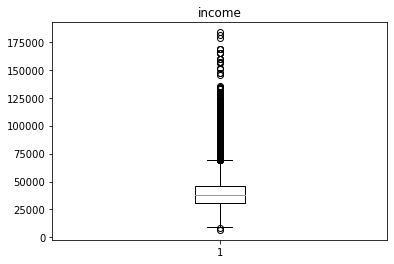

In [13]:
# Creating a boxplot for the 'income' column
plt.boxplot(outlier_data['income'])    
# Naming the box plot after the name of the column     
plt.title('income')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff4cfdec9b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff4cfdec0b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4cfdec898>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff4cfd917b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4cfd919e8>],
 'means': []}

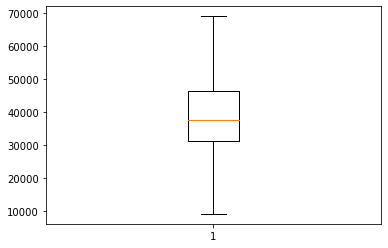

In [18]:
# Same code used in our competition 2 Normalization notebook
# Defining the function 'outlier' to help with major outliers in the 'income' column

def outlier(x):
    if x > (Q3 + (1.5*IQR)):
        x=Q3
    elif x <(Q1 - (1.5*IQR)):
        x=Q1
    else:
        pass
    return(x)

# Setting the Q1 and Q3 variables to the necessary quartiles
Q1 = outlier_data['income'].quantile(0.25)
Q3 = outlier_data['income'].quantile(0.75)
IQR = iqr(outlier_data['income'])

# Applying the function above to the income column
outlier_data['income'] = outlier_data['income'].apply(outlier)

# Plotting the box plot
plt.boxplot(outlier_data['income'])

In [19]:
# Showing the pre-normalized mean of the 'income' data
outlier_data.mean()

income    38789.866508
dtype: float64

In [20]:
# Creating the column name to be inputed into the new normalized data
norm_cols = ['income']

# Normalizing the two columns in 'outlier_data' using the MinMax function
minmax = preprocessing.MinMaxScaler()
norm = (minmax.fit_transform(outlier_data))
norm = pd.DataFrame(norm, columns=norm_cols)

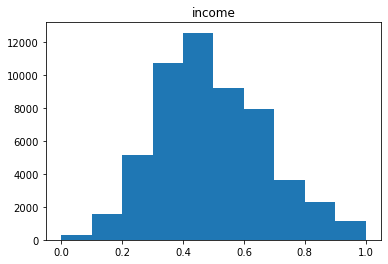

In [21]:
# Creating a histogram for the 'income' column
plt.hist(norm['income'])    
# Naming the box plot after the name of the column     
plt.title('income')
plt.show()

In [22]:
# Showing the normalized mean of the 'income' data
norm.mean()

income    0.49324
dtype: float64

In [23]:
# Combining the two datasets (original and normalized) back into one
data = pd.concat([data, norm, Y], axis = 1)
data.head()

,year,agent,pay_method,state,status,pay_method_ACH,pay_method_credit card,pay_method_paper check,region_central,region_north_east,region_rocky,region_south,region_south_east,region_west,status_Active,status_Decline,status_Returned,status_Returned_90,income,Y
0,2017.0,Yasha - Pers1 (264925),credit card,north_east,Returned,0,1,0,0,1,0,0,0,0,0,0,1,0,0.620241,0
1,2015.0,Benefits and More 4 Paid (143595),credit card,north_east,Returned,0,1,0,0,1,0,0,0,0,0,0,1,0,0.701398,1
2,2014.0,Newspaper (109455),credit card,north_east,Order Cancelled,0,1,0,0,1,0,0,0,0,0,0,0,0,0.333751,0
3,2014.0,Hospital (109465),credit card,north_east,Returned_90,0,1,0,0,1,0,0,0,0,0,0,0,1,0.333751,0
4,2015.0,Benefits and More 4 Paid (143595),credit card,north_east,Returned,0,1,0,0,1,0,0,0,0,0,0,1,0,0.333751,1


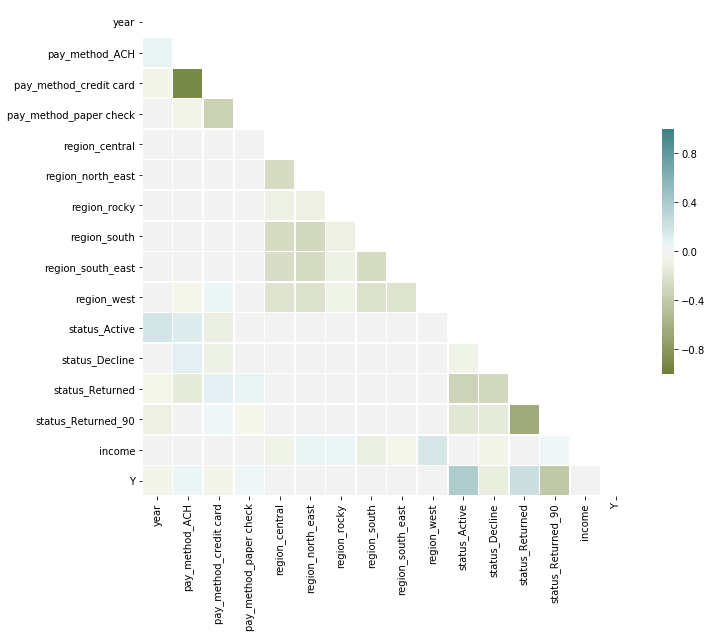

In [24]:
# I AM USING THIS CODE FROM COMPETITION 2 OF OUR DATA MINING PROJECT

# Setting the correlation matrix equal to a variable 
# in order to visualize it
correlation_visual = data.corr(method='spearman')

# Hiding the top half of the correlation matrix to make
# it easier to read
hide = np.zeros_like(correlation_visual, dtype=np.bool)
hide[np.triu_indices_from(hide)] = True

# Setting the subplot for the correlation matrix
f , ax = plt.subplots(figsize=(11,9))

# Generating a diverging colormap
cmap = sns.diverging_palette(100, 200, as_cmap=True)

# Putting in the heatmap element of the correlation visualization
sns.heatmap(correlation_visual, mask=hide, cmap=cmap, vmin=-1,vmax=1, center=0, square=True, 
            linewidths=.6, cbar_kws={"shrink": .5})

In [10]:
# Exporting the imputed and normalized dataset to a csv file 
# to be used in the other classification models
data.to_csv('final_data.csv',',')